## Writeup Template

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Advanced Lane Finding Project**

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

[//]: # (Image References)

[image1]: ./examples/undistort_output.png "Undistorted"
[image2]: ./test_images/test1.jpg "Road Transformed"
[image3]: ./examples/binary_combo_example.jpg "Binary Example"
[image4]: ./examples/warped_straight_lines.jpg "Warp Example"
[image5]: ./examples/color_fit_lines.jpg "Fit Visual"
[image6]: ./examples/example_output.jpg "Output"
[video1]: ./project_video.mp4 "Video"


## [Rubric](https://review.udacity.com/#!/rubrics/571/view) Points

### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---


### Camera Calibration

#### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

The code for this step is contained in the undistort() function located in  in lines #10 of the file called `main.py`).  

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image.  Thus, `objp` is just a replicated array of coordinates, and `objpoints` will be appended with a copy of it every time I successfully detect all chessboard corners in a test image.  `imgpoints` will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.  

I then used the output `objpoints` and `imgpoints` to compute the camera calibration and distortion coefficients using the `cv2.calibrateCamera()` function.  I applied this distortion correction to the test image using the `cv2.undistort()` function and obtained this result: 
#### Distorted Chessboard Image
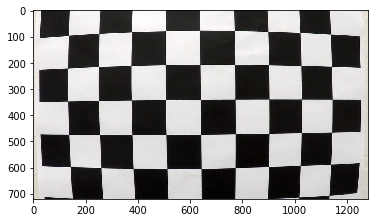
#### Undistorted Chessboard Image
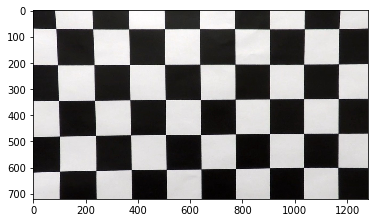

### Pipeline (single images)

#### 1. Provide an example of a distortion-corrected image.

To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:
#### Distorted Test Image
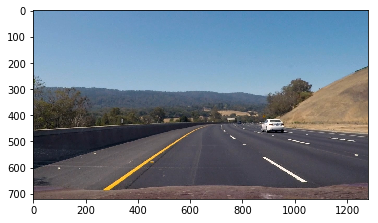
#### Undistorted Test Image
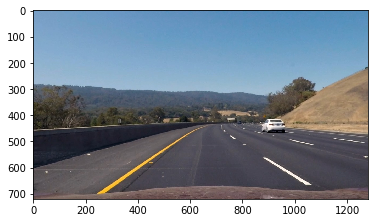


#### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image.  Provide an example of a binary image result.

I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines #91 in find_gradient() function in `main.py`).find_gradient() calls abs_sobel_thresh() for absolute thresholding ,find_mag() to calculate magnitude and find_dir() to calculate direction.  Here's an example of my output for this step.  (note: this is not actually from one of the test images)
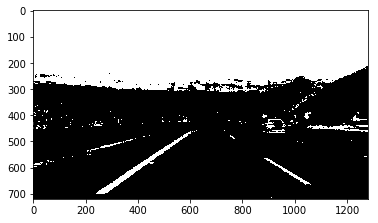

#### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes in a function called `transform(img_binary, trans_type)`, which appears in lines 114 in the file `main.py` .  The `warper()` function takes as inputs a binary image (`img_binary`), as well as transpose type (`trans_type`) for forward or inverse transpose .I chose the hardcode the source and destination points in the following manner:

```python
rows,cols=img_binary.shape[:2]
bottom_left = [cols * 0.20, rows]
top_left = [cols * 0.47, rows * 0.62]
bottom_right = [cols * 0.87, rows]
top_right = [cols * 0.53, rows * 0.62]
src = np.float32([bottom_left, bottom_right, top_right, top_left])

dst = np.float32(
        [
            [cols * 0.25, rows],  # bottom_left
            [cols * 0.75, rows],  # bottom_right
            [cols * 0.75, rows * 0],  # top_right
            [cols * 0.25, rows * 0],  # top_left
        ])

```

This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 256 , 720    |  320 , 720     | 
| 1113 , 720   |  960 , 720     |
| 678 , 446    |  960 , 0       |
| 601 , 446    |  320 , 0       |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.

#### Lines joining src points 
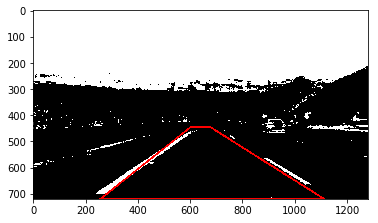

#### Warped image showing destination points

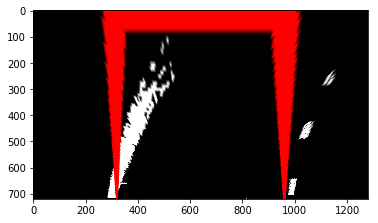

#### 4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

After applying perspective transform i have applied histogram on the half image (code is provided on line 145 in fuction draw_lanes(binary_warped)),which gave me y values on each x like this.
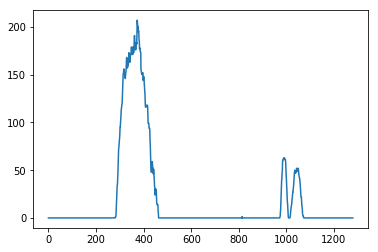 

Now i have searched for one maximum value on each of middle. I can use that as a starting point for where to search for the lines. From that point, I can use a sliding window, placed around the line centers, to find and follow the lines up to the top of the frame

Steps for code:

* Choose the number of sliding windows on frame
* Set height of windows
* Identify the x and y positions of all nonzero pixels in the image (the pixels are represented as 0 or 255)
* Current positions to be updated for each window
* Set the width of the windows +/- margin
* Set minimum number of pixels found to recenter window
* Create empty lists to receive left and right lane pixel indices
* Step through the windows one by one
* Identify window boundaries in x and y (and right and left)
* Identify the nonzero pixels in x and y within the window
* Append these indices to the lists
* If you found > minpix pixels, recenter next window on their mean position
* Concatenate the arrays of indices
* Extract left and right line pixel positions
* Fit a second order polynomial to each left and right.

After applying each step i get the outputs as below.
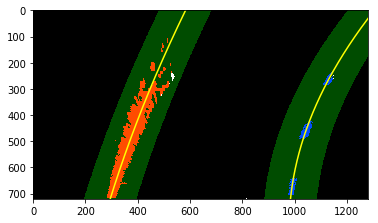
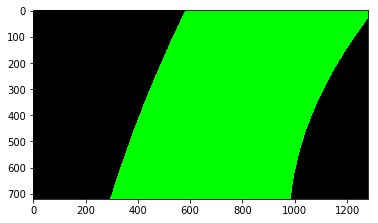

#### 5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

I did this in lines #237  in my code in `main.py`.I have first converted my pixel space to meters .Then i find out left and right line on new meter space x and y values.Then i calculated radius of curvature as given in image below
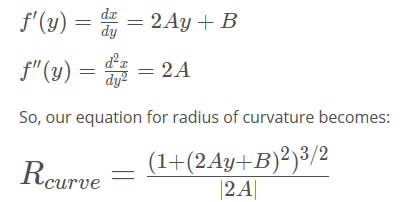

For vehicle position (check code on line #250)i take out center of left and right lanes and then i substracted lane center position with my frame center and multiplied it by meters per pixel in x dimension

#### 6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

I implemented this step in lines #279 and #283 inside  `main.py` file in the function `main()`.First i have done inverse transform and the i applied weighted average of original image and transformed image.  Here is an example of my result on a test image:

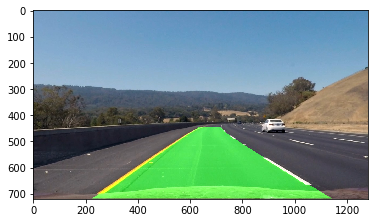

---


### Pipeline (video)

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!).

[output2](./output2.mp4)

---


### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

In the beginning the coloured area was covering left most part also then I changed the  source and destination ponits and gradient, to tackle this problem.
The edges were flickering very much so I have taken the average for smoothening.
This will fail in very sharp turns. This method is not state of the art ,we should include deep learning model to predict lanes (image segmentation) because this method will fail if some object will appear in our ROI.